In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/cluster_Data.csv')

In [3]:
data.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


In [4]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     342 non-null    float64
 1   bill_depth_mm      342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
dtypes: float64(4)
memory usage: 10.8 KB


In [6]:
from yellowbrick.cluster import KElbowVisualizer

def get_n_clusters(model, data):
    
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    
    # elbow
    model_elbow = model
    visualizer = KElbowVisualizer(model_elbow, k=(2,30), show = False)
    visualizer.fit(scaled_data)
    n_clusters_elbow = visualizer.elbow_value_
    
    # silhouette
    model_silhouette = model
    visualizer = KElbowVisualizer(model_silhouette, k=(2,30), metric = 'silhouette', show = False)
    visualizer.fit(scaled_data)
    n_clusters_silhouette = visualizer.elbow_value_
    
    # calinski_harabasz
    
    model_calinski = model
    visualizer = KElbowVisualizer(model_calinski, k=(2,30),metric='calinski_harabasz', show = False)
    visualizer.fit(scaled_data)
    n_clusters_calinski = visualizer.elbow_value_
    
    plt.close()
    
    
    
    res =  {'elbow': n_clusters_elbow,
           'silhouette': n_clusters_silhouette, 
           'calinski_harabasz': n_clusters_calinski}
    
    votes = [res[list(res.keys())[i]] for i in range(len(res))]
    majority = max(set(votes), key = votes.count)
    
    return res, majority


In [7]:
from sklearn.cluster import KMeans, DBSCAN

kmeans = KMeans()
res, n_clusters = get_n_clusters(kmeans, data)

print('Result: ', res)
print('N-clusters: ', n_clusters)

Result:  {'elbow': 6, 'silhouette': 2, 'calinski_harabasz': 2}
N-clusters:  2


# Umap

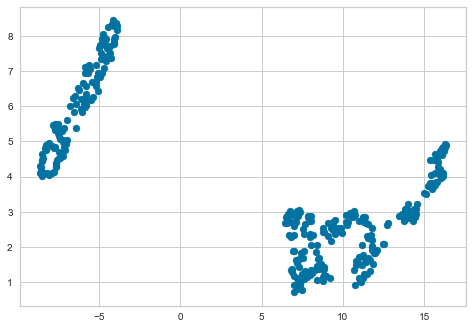

In [8]:
import umap

scaled_data = StandardScaler().fit_transform(data)

reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_data)

plt.scatter(embedding[:, 0], embedding[:, 1])
plt.show()

# t-SNE

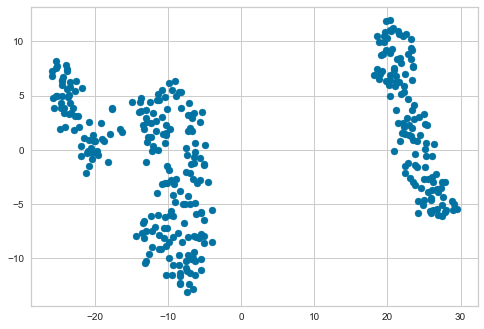

In [9]:
from openTSNE import TSNE

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

X = np.asarray(scaled_data)

embedding = TSNE().fit(X)

plt.scatter(embedding[:,0], embedding[:,1])
plt.show()

# PCA

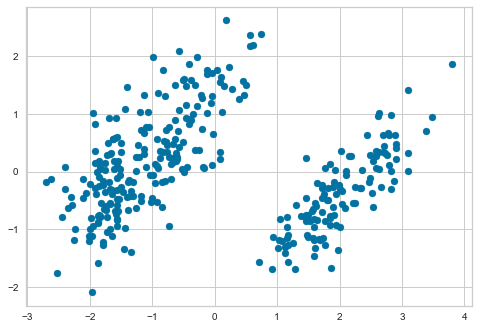

In [10]:
from sklearn.decomposition import PCA

# PCA kräver att alla features har samma skala så vi kör standardscaling på vår data så alla har ett 
# medelvärde på 0 och en standardavvikelse på 1. Annars hade pca sagt att kolumner med höga värden 
# bidrar med hög varians i datat, vilket nödvändigtvis inte är fallet.
    
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

X = np.asarray(scaled_data)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

plt.scatter(principal_components[:,0], principal_components[:,1])
plt.show()

# GMM

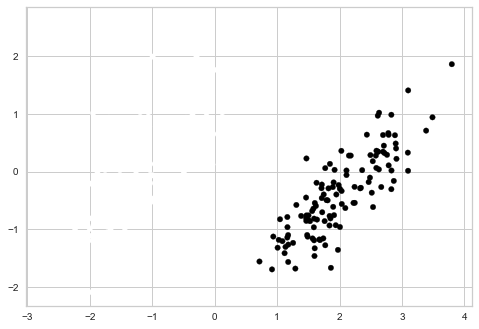

In [11]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=n_clusters, random_state=0).fit(X)

plt.scatter(principal_components[:,0], principal_components[:,1], c = gm.predict(X), s = 30)
plt.show()

# DBSCAN

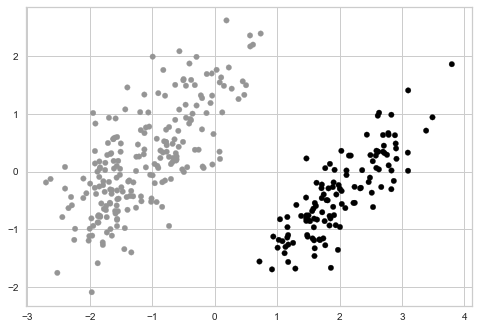

In [12]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=1, min_samples=2).fit(X)

plt.scatter(principal_components[:,0], principal_components[:,1], c = clustering.labels_, s = 30)
plt.show()